### Holiday Package Prediction

##### 1. Problem Statement

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


##### Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df.Gender.value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['Gender'] = df['Gender'].replace("Fe Male","Female")

In [7]:
df.Gender.value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [8]:
df.ProdTaken.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [9]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [10]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [11]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [12]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [13]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [14]:
df['MaritalStatus'] = df['MaritalStatus'].replace("Single","Unmarried")
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [15]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [16]:
features_with_null = [feature for feature in df.columns if df[feature].isnull().sum()>0]
features_with_null
for feature in features_with_null:
    print(f"{feature} has {df[feature].isnull().sum()}")

Age has 226
TypeofContact has 25
DurationOfPitch has 251
NumberOfFollowups has 45
PreferredPropertyStar has 26
NumberOfTrips has 140
NumberOfChildrenVisiting has 66
MonthlyIncome has 233


In [17]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

- We have no of persons visiting and no of children visiting so we can combine them both

In [18]:
numeric_features = [features for features in df[features_with_null] if df[features].dtype!='O']
numeric_features


['Age',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

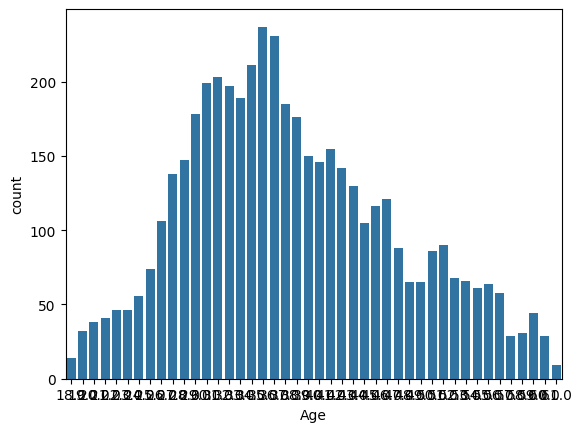

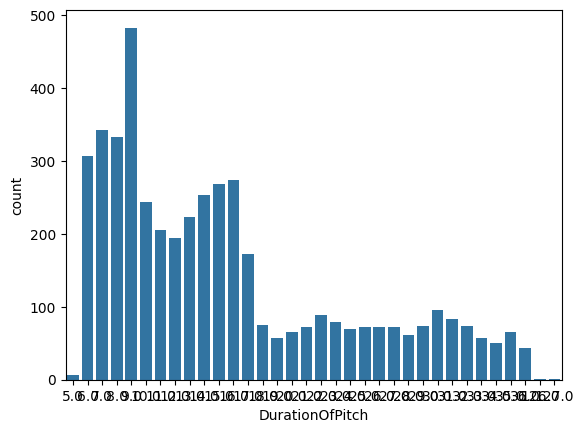

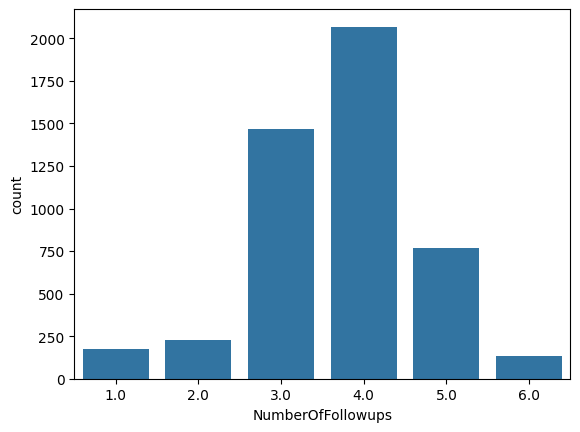

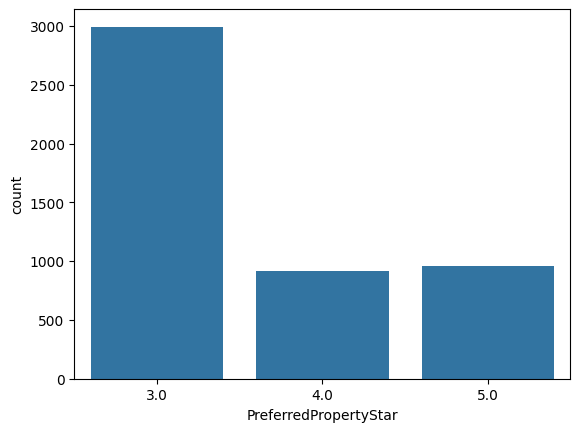

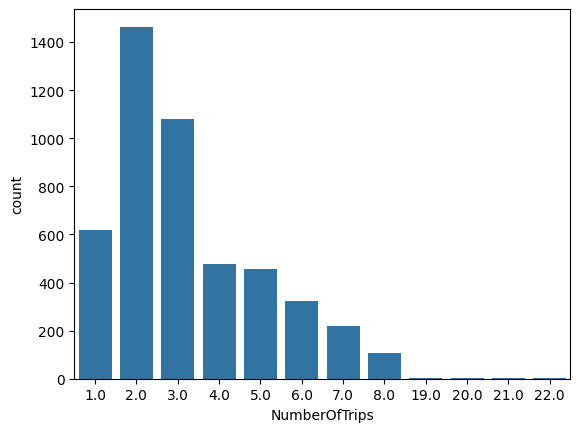

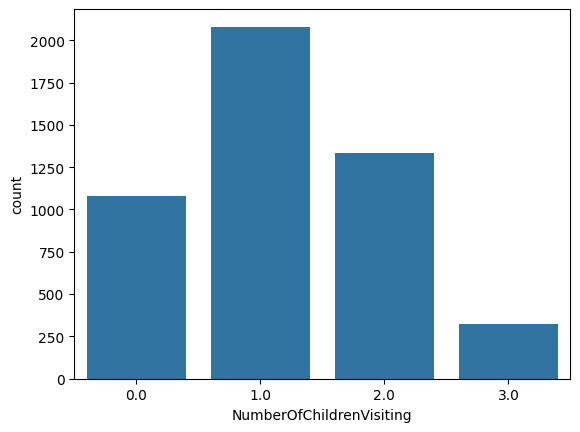

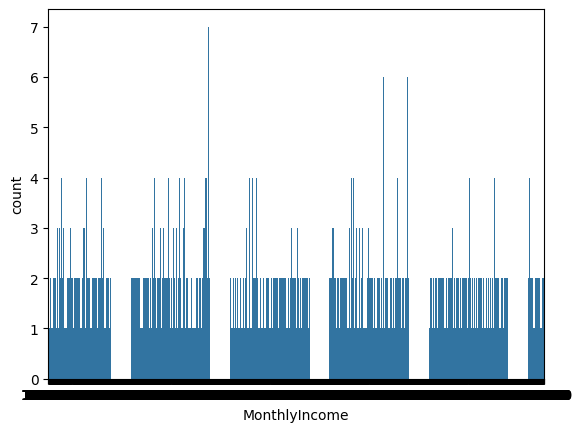

In [21]:
for feature in numeric_features:
    plt.figure()
    sns.countplot(x=df[feature],data=df)
    plt.xlabel(feature)


In [22]:
num_dis_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 20]
num_dis_features

['NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting']

In [23]:
for feature in num_dis_features:
    df[feature].fillna(df[feature].mode()[0],inplace=True)

C:\Users\Paul\AppData\Local\Temp\ipykernel_7656\376402263.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mode()[0],inplace=True)


In [24]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               233
dtype: int64

In [25]:
# ['Age',
#  'DurationOfPitch',
#  'NumberOfFollowups',
#  'PreferredPropertyStar',
#  'NumberOfTrips',
#  'NumberOfChildrenVisiting',
#  'MonthlyIncome']

# ['NumberOfFollowups',
#  'PreferredPropertyStar',
#  'NumberOfTrips',
#  'NumberOfChildrenVisiting']

In [26]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)

C:\Users\Paul\AppData\Local\Temp\ipykernel_7656\1294631718.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True)
C:\Users\Paul\AppData\Local\Temp\ipykernel_7656\1294631718.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [27]:
df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [28]:
type(df['TypeofContact'][1])

str

In [29]:
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)

C:\Users\Paul\AppData\Local\Temp\ipykernel_7656\3734832821.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)


In [30]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [31]:
df['TotalVisited'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['CustomerID','NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [32]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalVisited'],
      dtype='object')

In [33]:
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [35]:
X_train.shape,X_test.shape

((3666, 17), (1222, 17))

In [36]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',num_transformer,num_features)
    ]
)

In [37]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisited'],
      dtype='object'))])

In [38]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [40]:
models = {
    "Adaboost":AdaBoostClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Logistic":LogisticRegression()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    ## Testing set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])

    print("Model Performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))


    print('------------------------------------------------------------------')

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))
    
    print()

Adaboost
Model Performance for Training set
- Accuracy: 0.8445
- F1 score: 0.8078
- Precision: 0.7800
- Recall: 0.2287
- ROC AUC Score: 0.6070
------------------------------------------------------------------
Model Performance for Test set
- Accuracy: 0.8412
- F1 score: 0.8084
- Precision: 0.7683
- Recall: 0.2647
- ROC AUC Score: 0.6227

Random Forest
Model Performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
------------------------------------------------------------------
Model Performance for Test set
- Accuracy: 0.9133
- F1 score: 0.9050
- Precision: 0.9459
- Recall: 0.5882
- ROC AUC Score: 0.7901

Decision Tree
Model Performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
------------------------------------------------------------------
Model Performance for Test set
- Accuracy: 0.8977
- F1 score: 0.8984
- Precision: 0.7287
- Recall:

In [41]:
## Hyper Paramter Training

# For Random Forest
rf_params = {
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

adaboost_params = {
    'n_estimators' : [50,60,70,80,90],
    'algorithm' : ['SAMME','SAMME.R']
}

In [50]:
randomcv_models = [
    ("RF",RandomForestClassifier(),rf_params),
    ("Adaboost",AdaBoostClassifier(),adaboost_params),
]

In [51]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}

for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train,y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"----------------- Best Params for {model_name} ---------------")
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Paul\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
63 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Paul\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Paul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Paul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_p

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Paul\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Paul\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Paul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Paul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_pa

----------------- Best Params for RF ---------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 7, 'max_depth': 15}
----------------- Best Params for Adaboost ---------------
{'n_estimators': 70, 'algorithm': 'SAMME'}


In [53]:
models = {
    "Adaboost": AdaBoostClassifier(n_estimators= 70, algorithm= 'SAMME'),
    "Random Forest": RandomForestClassifier(n_estimators= 200, min_samples_split= 2, max_features= 7, max_depth= 15),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    ## Testing set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])

    print("Model Performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))


    print('------------------------------------------------------------------')

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))
    
    print()

C:\Users\Paul\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Adaboost
Model Performance for Training set
- Accuracy: 0.8486
- F1 score: 0.8185
- Precision: 0.7550
- Recall: 0.2757
- ROC AUC Score: 0.6276
------------------------------------------------------------------
Model Performance for Test set
- Accuracy: 0.8462
- F1 score: 0.8174
- Precision: 0.7717
- Recall: 0.2983
- ROC AUC Score: 0.6385

Random Forest
Model Performance for Training set
- Accuracy: 0.9989
- F1 score: 0.9989
- Precision: 1.0000
- Recall: 0.9941
- ROC AUC Score: 0.9971
------------------------------------------------------------------
Model Performance for Test set
- Accuracy: 0.9223
- F1 score: 0.9160
- Precision: 0.9497
- Recall: 0.6345
- ROC AUC Score: 0.8132



C:\Users\Paul\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


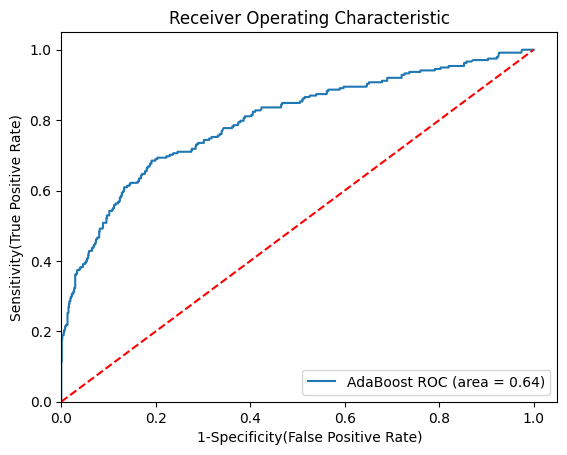

In [57]:
## Plot the ROC AUC Curve

from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

## Add the model to the list that you eant to view on the ROC plot
auc_models = [
    {
        'label': 'AdaBoost',
        'model' : AdaBoostClassifier(n_estimators= 70, algorithm= 'SAMME'),
        'auc': 0.6385
    }
]

# Create loop through all labels
for algo in auc_models:
    model = algo['model'] #Select the model
    model.fit(X_train, y_train) #Train the model

# Compute False Positive rate, and True Positive rate
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 